In [1]:
import pandas as pd

# Baca file CSV
df = pd.read_csv("data.csv")

# Inisialisasi variabel
filtered_rows = []
last_status = None

# Proses pemilahan data
for index, row in df.iterrows():
    if row['Voltage (V)'] <= 3.0 or row['SOC'] <= 0.01:
        break
    if row['Status'] == 'REST' and last_status != 'REST':
        filtered_rows.append(row)
    last_status = row['Status']

# Buat DataFrame hasil filter
filtered_df = pd.DataFrame(filtered_rows)

# Simpan ke file Excel
filtered_df.to_excel("filtered_rest_data.xlsx", index=False)

# Tampilkan beberapa data hasil filter
filtered_df.head()


,Data,Voltage (V),Current (mA),Total Drained (mAh),SOC,Status
0,1,4.156,-0.7,-0.000194,0.975117,REST
32,33,4.132,-0.7,-7.775472,0.972007,REST
92,93,4.120,-0.5,-15.538389,0.968902,REST
152,153,4.116,-0.5,-23.289222,0.965801,REST
212,213,4.108,-0.6,-31.028972,0.962705,REST


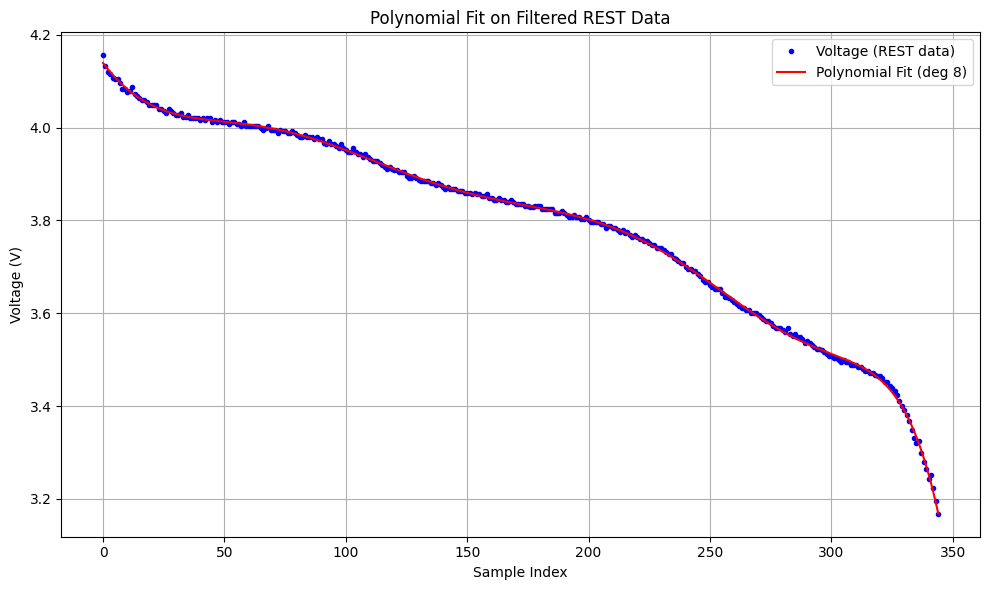

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load data hasil filter
df = pd.read_excel("filtered_rest_data.xlsx")

# 2. Buat sumbu X sebagai index (misalnya 0, 1, 2, ..., n)
x = np.arange(len(df))
y = df["Voltage (V)"]

# 3. Fit data dengan polinomial derajat tertentu (misal derajat 5)
degree = 8
coeffs = np.polyfit(x, y, degree)
poly_eq = np.poly1d(coeffs)

# 4. Hitung nilai fit (hasil dari polinomial)
y_fit = poly_eq(x)

# 5. Plot data asli dan kurva fit
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.', label="Voltage (REST data)")
plt.plot(x, y_fit, 'r-', label=f"Polynomial Fit (deg {degree})")
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.title("Polynomial Fit on Filtered REST Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
